# Modelling DOM elements with Python class (WIP)

## Basic DOM interacting

In [1]:
from IPython.display import Image
from tempfile import NamedTemporaryFile
from manen.browser import ChromeBrowser
from manen import page_object_model as pom

In [2]:
browser = ChromeBrowser.initialize(proxy=None, headless=False, window_size=(1152, 864))
browser.get("https://pypi.org")

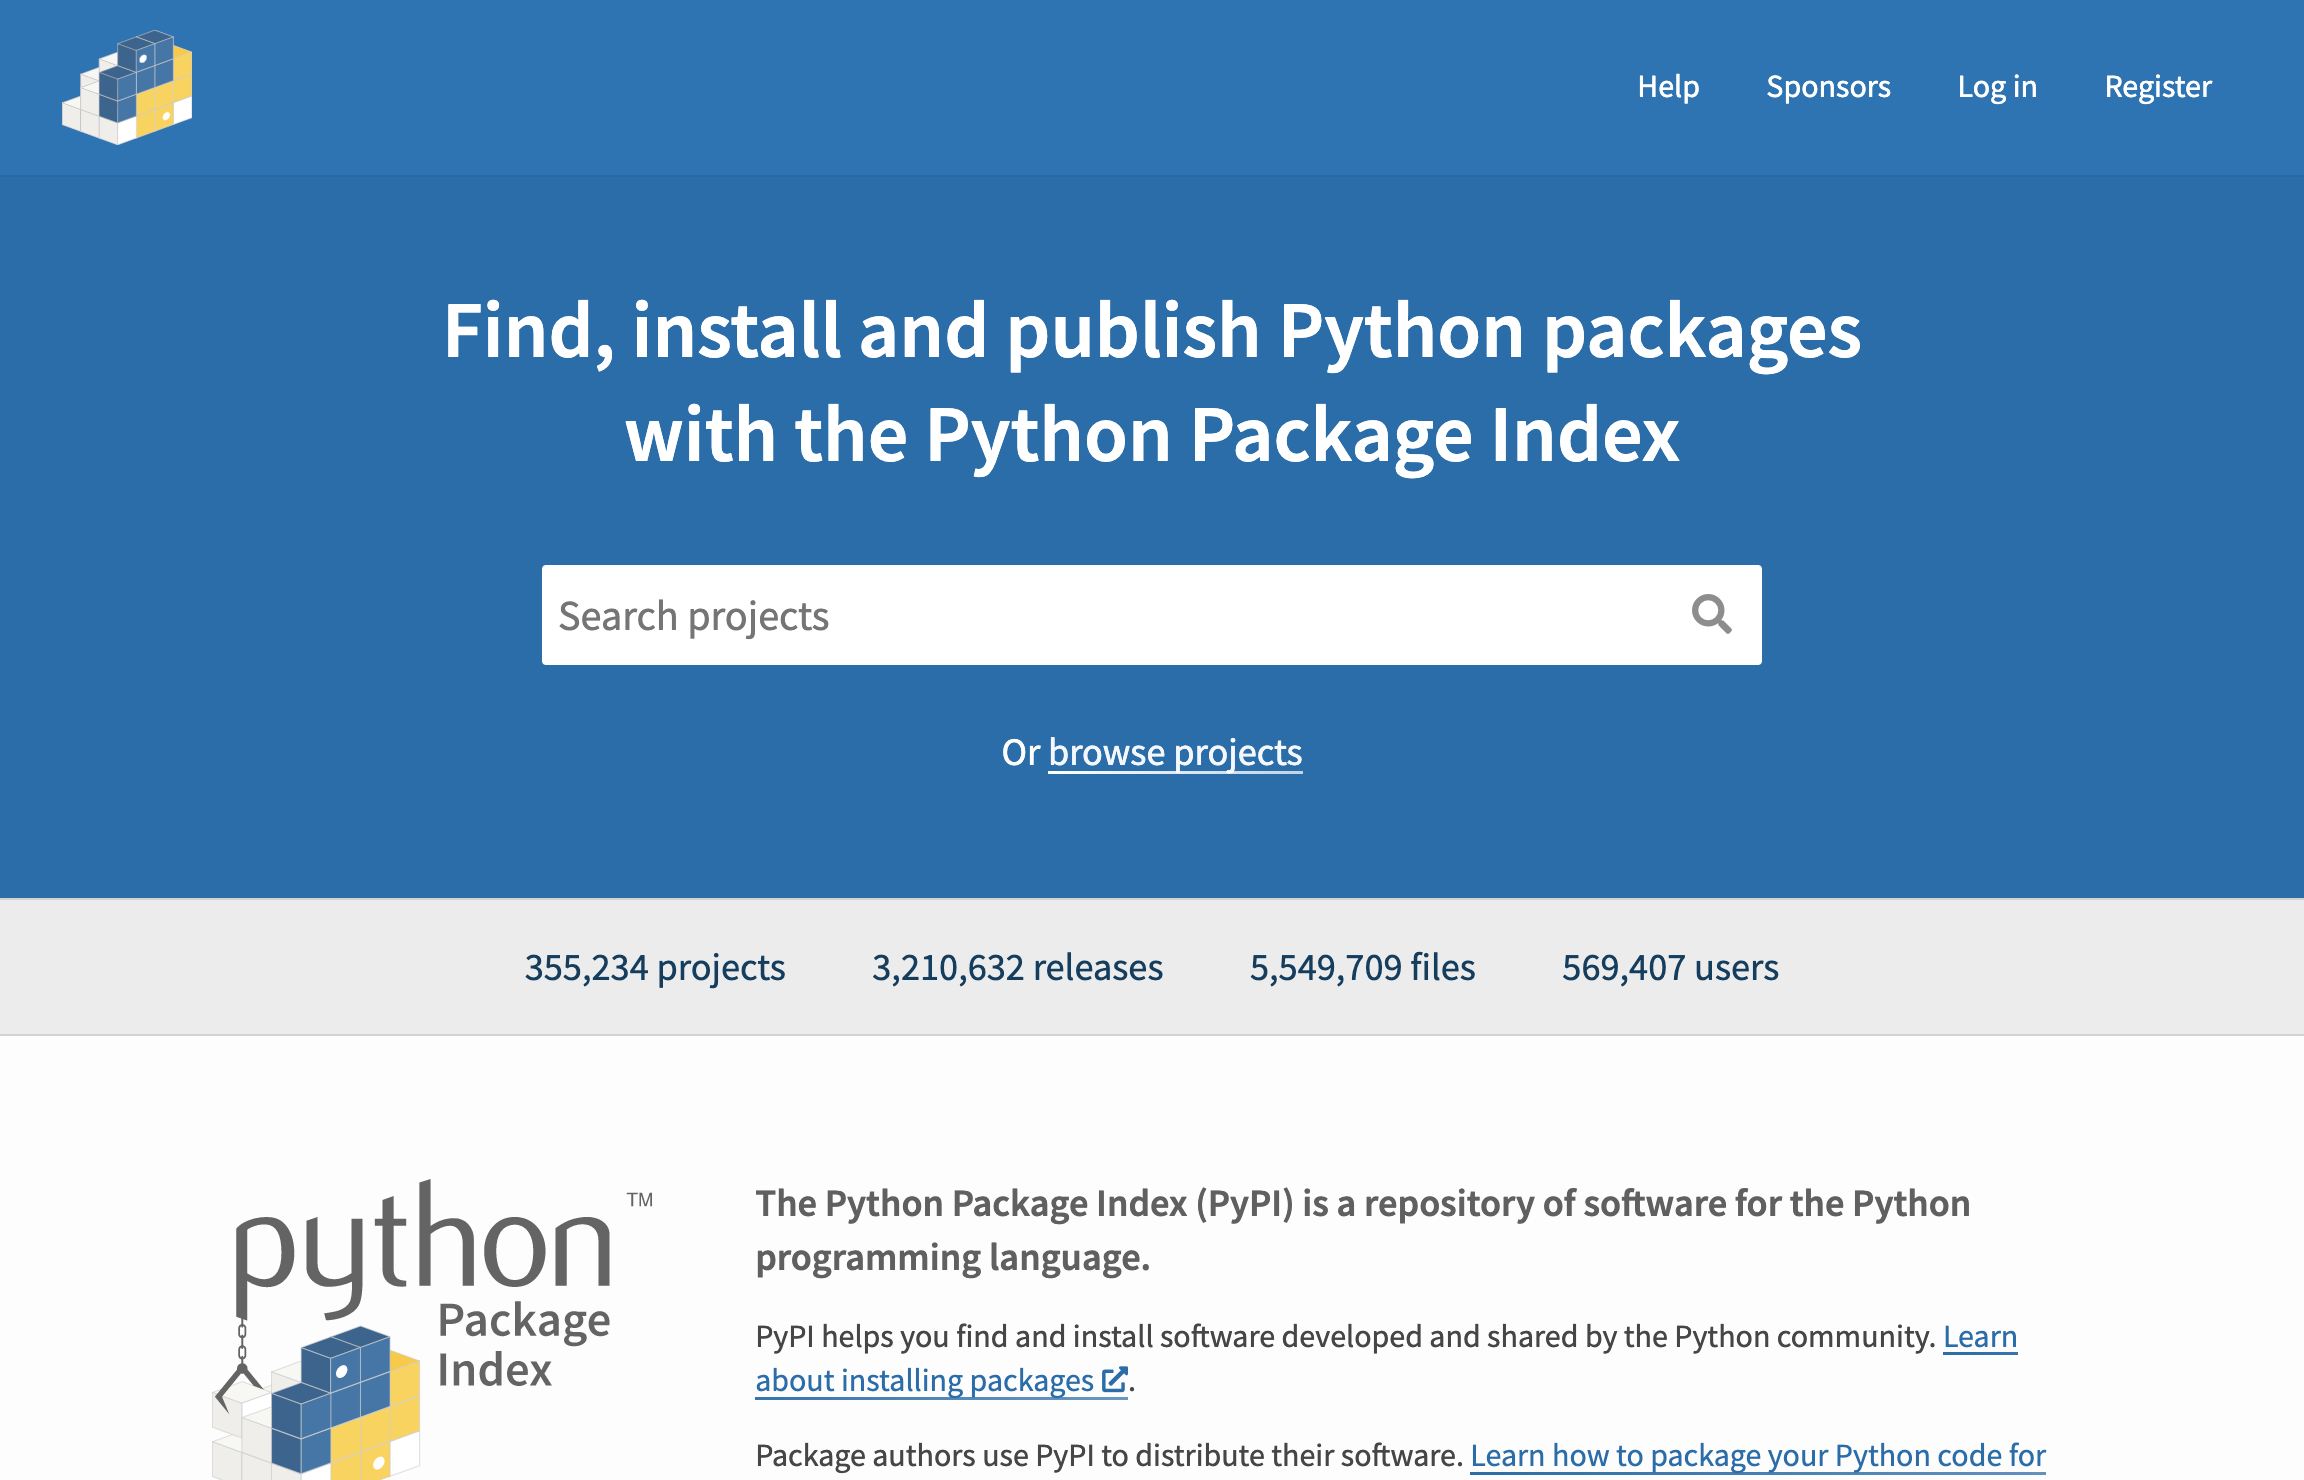

In [3]:
with NamedTemporaryFile() as f:
    browser.save_screenshot(f.name + '.png')
    screenshot = Image(f.name + '.png')
screenshot

In [4]:
class HomePage(pom.Page):
    query = pom.InputElement("input[id='search']")

page = HomePage(browser)

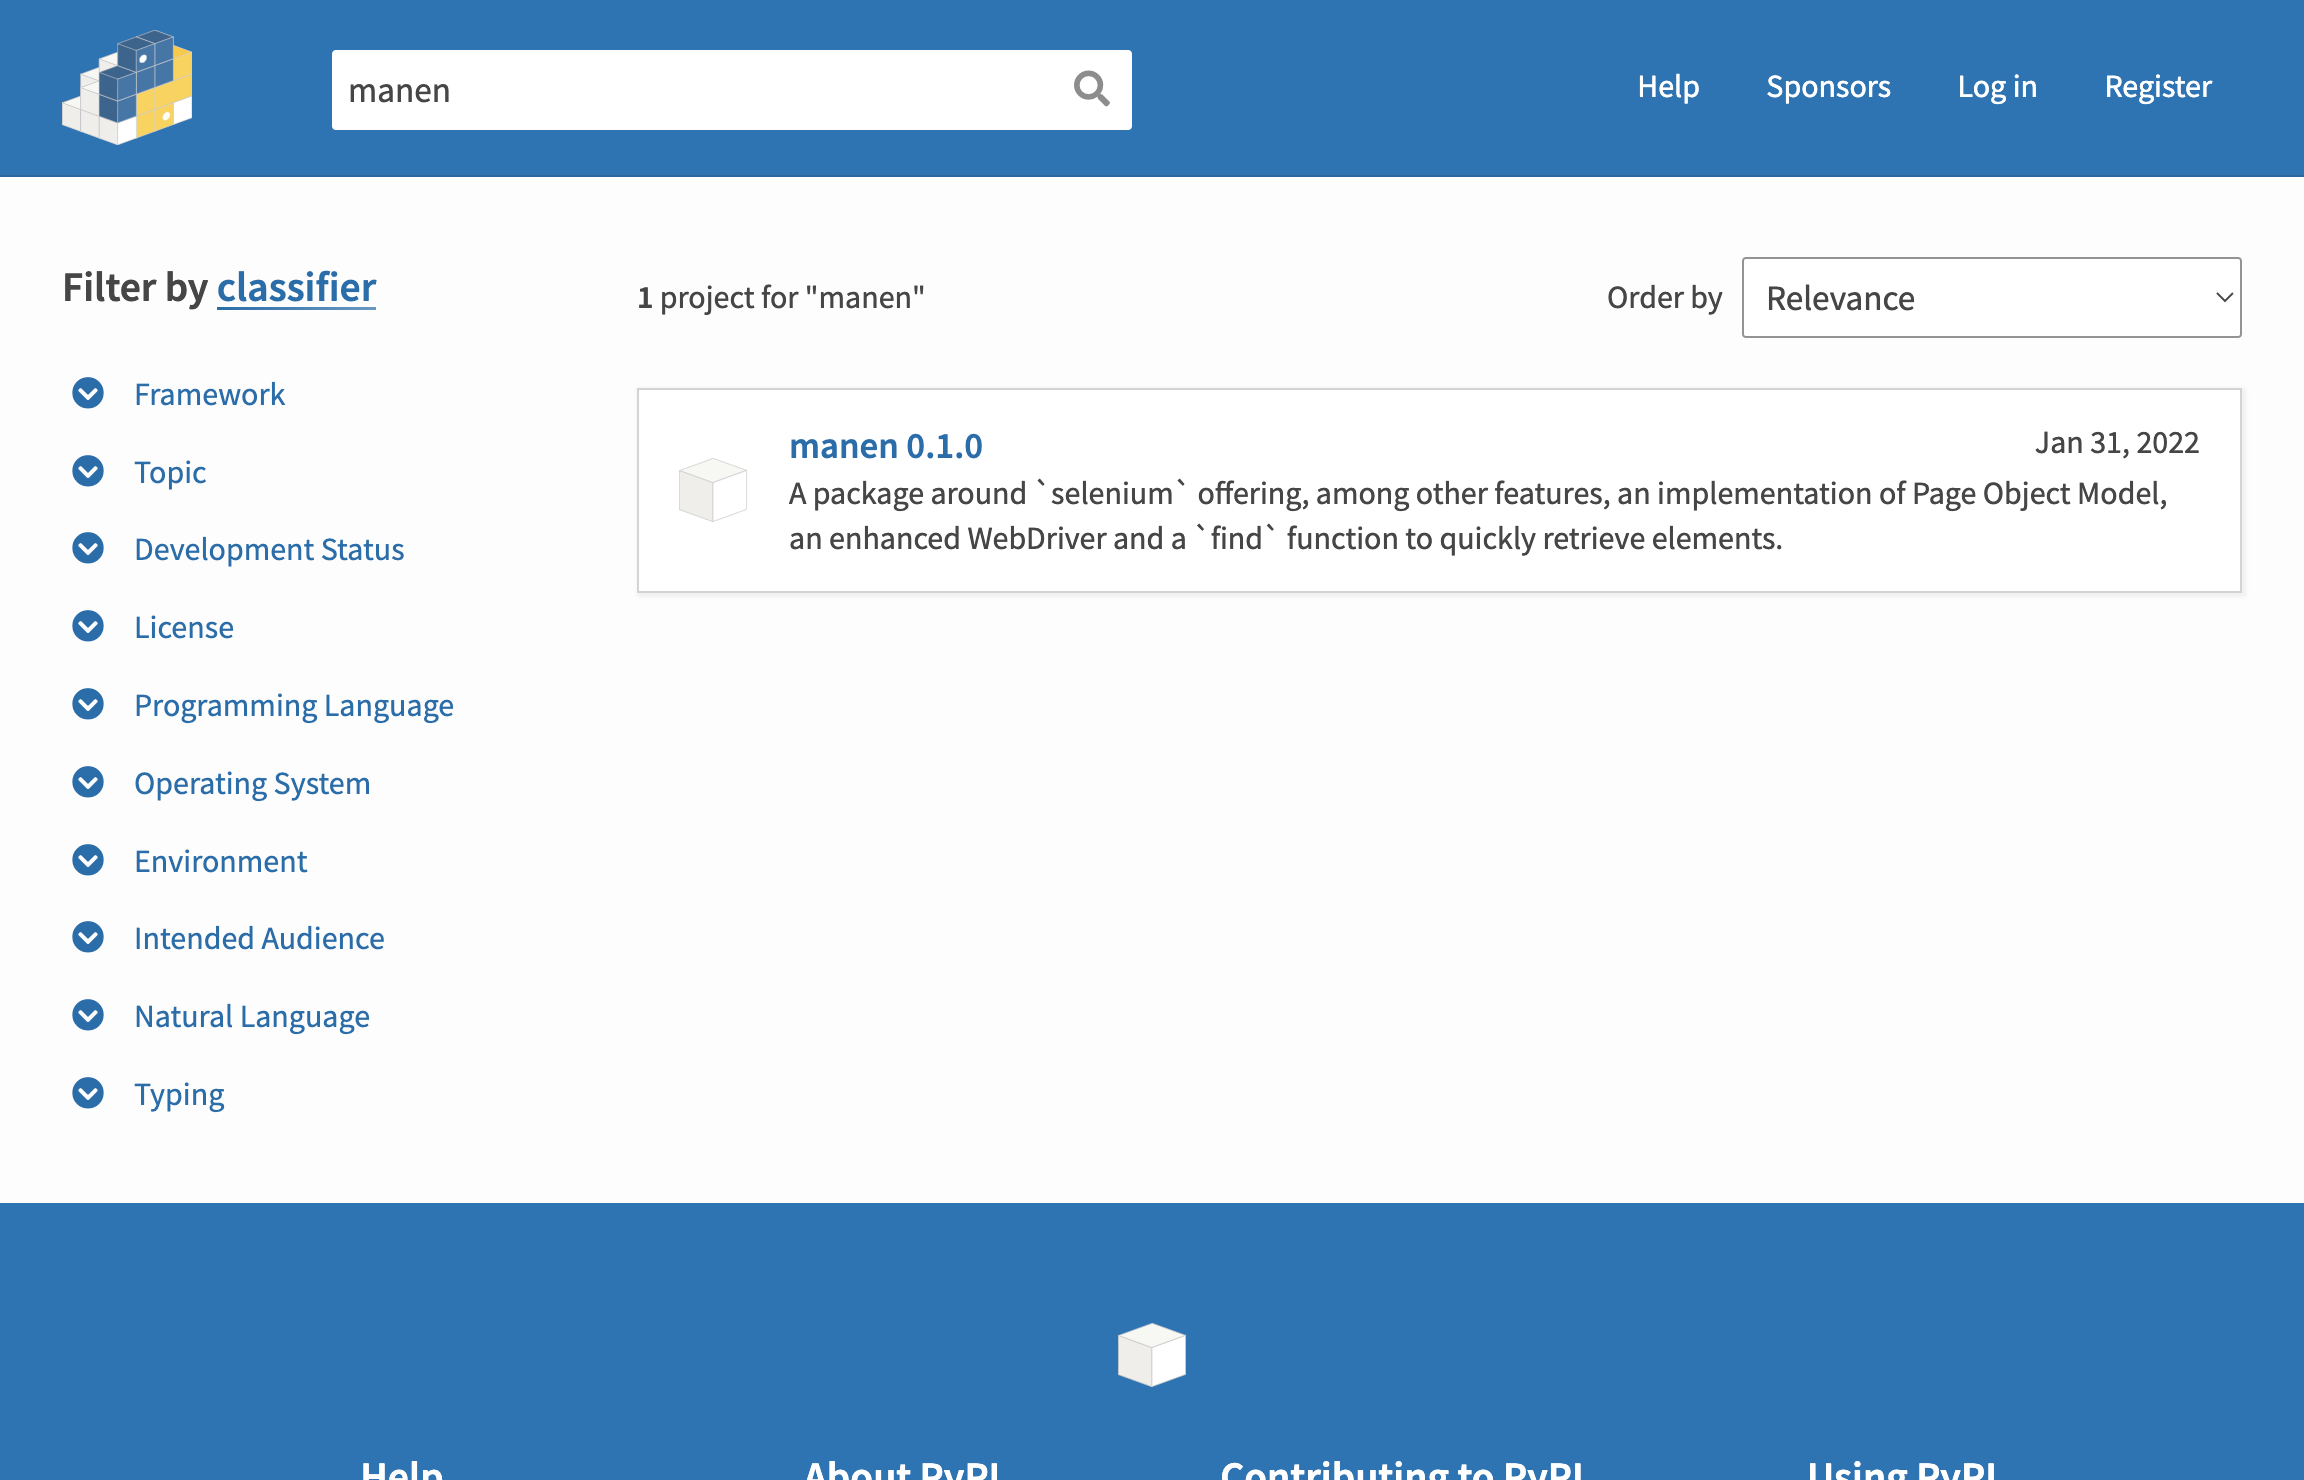

In [5]:
page.query = "manen"
page.query = pom.Action("submit")

with NamedTemporaryFile() as f:
    browser.save_screenshot(f.name + '.png')
    screenshot = Image(f.name + '.png')
screenshot

In [6]:
class SearchResultPage(pom.Page):
    class ResultRegions(pom.Regions):
        name = pom.TextElement("h3 span.package-snippet__name")
        version = pom.TextElement("h3 span.package-snippet__version")
        link = pom.LinkElement("a.package-snippet")
        description = pom.TextElement("p.package-snippet__description")

    n_results = pom.IntegerElement("//*[@id='content']//form/div[1]/div[1]/p/strong")
    results = ResultRegions("ul[aria-label='Search results'] li")

In [7]:
browser.quit()

## List of all elements

In [8]:
from manen.page_object_model import __all__
[elt for elt in __all__ if 'Element' in elt]

['CheckboxElement',
 'DatetimeElement',
 'DatetimeElements',
 'Element',
 'Elements',
 'ImageSourceElement',
 'ImageSourceElements',
 'InnerHtmlElement',
 'InnerHtmlElements',
 'InputElement',
 'IntegerElement',
 'IntegerElements',
 'LinkElement',
 'LinkElements',
 'OuterHtmlElement',
 'OuterHtmlElements',
 'RadioButtonElement',
 'SelectElement',
 'TextElement',
 'TextElements']